In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression_ml.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

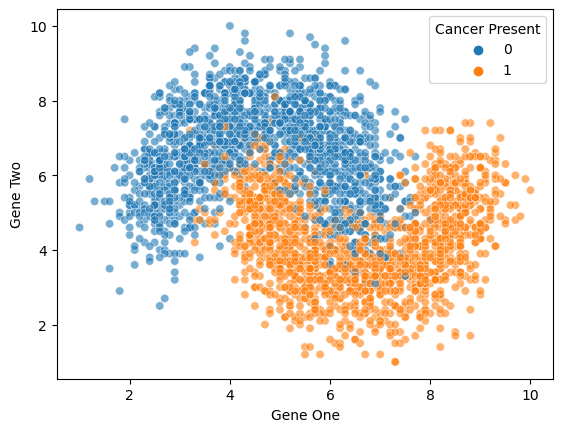

In [3]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.6 )

(3.0, 10.0)

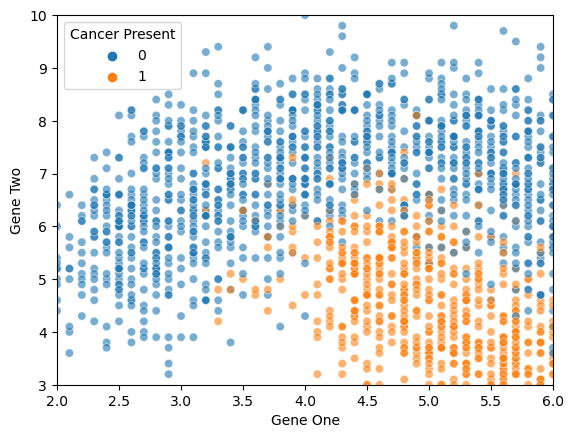

In [4]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.6 )
plt.xlim(2,6)
plt.ylim(3,10)

### Train | Test and Scaling Data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [8]:
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

### KNN model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
#we are choosing 1 neighbor

In [10]:
knn_model.fit(sc_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Model prediciton and performance

In [11]:
y_pred = knn_model.predict(sc_X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_score(y_test,y_pred)

In [14]:
confusion_matrix(y_test,y_pred)

array([[315,  39],
       [ 27, 369]])

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       354
           1       0.90      0.93      0.92       396

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750



### Elbow Method for choosing K value

In [16]:
test_error_rates = []

for k in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(sc_X_train,y_train)
    
    y_pred_test = knn_model.predict(sc_X_test)
    
    test_err = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_err)

Text(0.5, 0, 'K Value')

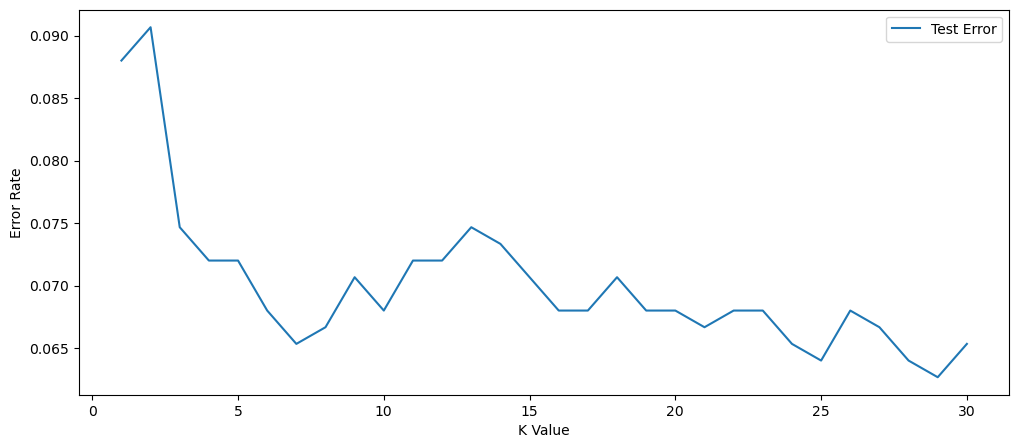

In [17]:
plt.figure(figsize=(12,5))
plt.plot(range(1,31),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

### Full cross-validation with grid-search for K-value


* pipeline -->> set up a workflow of operations -->> 1. scale the data 2. create model

1. split into training and test data as per cv
2. scale the data
3. model fits in the scaled data
4. trained model predicts the transformed test data

In [20]:
scaler = StandardScaler()

knn = KNeighborsClassifier()

In [21]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [22]:
operations = [('scaler',scaler),('knn',knn)]

In [23]:
from sklearn.pipeline import Pipeline

In [25]:
#help(Pipeline)

In [26]:
pipe = Pipeline(operations)

In [27]:
from sklearn.model_selection import GridSearchCV

k_values = range(1,20)

In [28]:
param_grid = {'knn__n_neighbors': k_values}

1. chosen_string_name + two underscores + parameter key name
2. model_name + __ + parameter name
3. knn_model + __ + n_neighbors
4. knn_model_n_neighbors

In [48]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5, scoring='accuracy')

In [49]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)}, scoring='accuracy')

In [50]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [51]:
len(k_values)

19

In [53]:
len(full_cv_classifier.cv_results_['mean_test_score'])

19

## Final Model

In [54]:
scaler = StandardScaler()
knn19 = KNeighborsClassifier(n_neighbors=19)
operations = [('scaler',scaler),('knn19',knn19)]

In [55]:
pipe = Pipeline(operations)

In [56]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn19', KNeighborsClassifier(n_neighbors=19))])

In [58]:
pipe_predict = pipe.predict(X_test)

In [59]:
print(classification_report(y_test,pipe_predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       354
           1       0.93      0.94      0.94       396

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750



Gene One    7.2
Gene Two    3.7
Name: 1067, dtype: float64

In [62]:
pipe.predict([[2.9,14.2]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [66]:
pipe.predict_proba([[11.9,14.2]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.57894737, 0.42105263]])

In [74]:
reshaped_sample = X_test.iloc[45].values.reshape(1,-1)
pipe.predict_proba(reshaped_sample)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.15789474, 0.84210526]])